# scRNA-seq dataset clustering
this is unsupervised machine learning
source: https://www.reneshbedre.com/blog/umap-in-python.html 

In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter


c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/gexp/ath_sc_expression.csv")
df.head(2)

,cells,AT1G01070,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,...,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
0,AAACCTGAGACAGACC-1,0.51,1.40,-0.26,-0.28,-0.24,-0.14,-0.13,-0.07,-0.29,...,0.61,-0.55,-0.41,-0.43,2.01,3.01,-0.24,-0.18,-0.34,1.16
1,AAACCTGAGATCCGAG-1,-0.22,1.36,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,...,-0.48,-0.55,-0.41,-0.43,-0.24,0.89,-0.24,-0.18,-0.49,-0.68


In [3]:
# set first column as index
df = df.set_index('cells')

# check the dimension (rows, columns)
df.shape

(4406, 2000)

In [4]:
embedding = umap.UMAP(random_state=42)
embedding = embedding.fit_transform(df)

embedding.shape

c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\marqu\SynologyDrive\Drive\Aktivitäten\FORSCHUNG\Talk IBEC Barcelona\workshop_py\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(4406, 2)

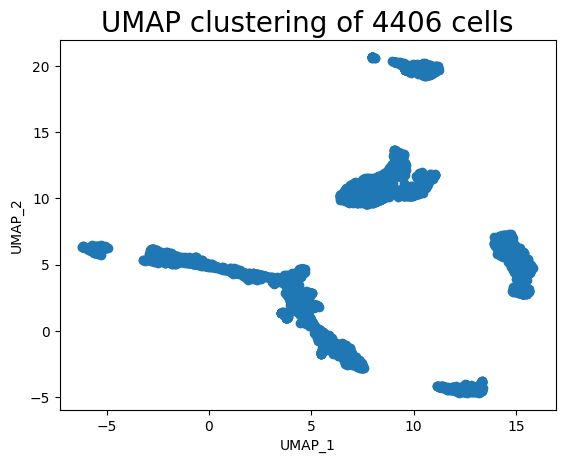

In [5]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP clustering of 4406 cells', fontsize=20)
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.show()

In [6]:
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
get_clusters = DBSCAN(eps = 3, min_samples = 4).fit_predict(embedding)

# check unique clusters
set(get_clusters)

{0, 1, 2, 3, 4}

In [7]:
# get count of samples in each cluster
Counter(get_clusters)

Counter({1: 1940, 0: 1175, 2: 774, 4: 288, 3: 229})

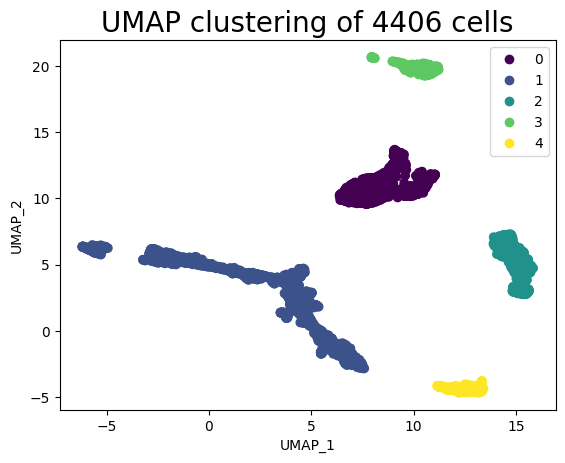

In [8]:
s = plt.scatter(embedding[:, 0], embedding[:, 1], c = get_clusters, cmap = 'viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend(s.legend_elements()[0], list(set(get_clusters)))
plt.title('UMAP clustering of 4406 cells', fontsize=20)
plt.show()

In [9]:
# print table with cells from the cluster 1
df[get_clusters == 1].head(5)

,AT1G01070,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,...,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
cells,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGTGTGAAT-1,-0.22,2.49,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,...,-0.48,-0.55,2.92,-0.43,-0.24,2.82,-0.24,-0.18,-0.49,1.60
AAACCTGGTCCGTGAC-1,-0.22,1.38,-0.26,-0.28,0.46,-0.22,-0.13,-0.07,-0.29,-0.31,...,0.00,0.38,0.87,0.47,0.04,0.18,-0.24,-0.18,-0.49,-0.12
AAACCTGGTTCGGGCT-1,1.85,-0.05,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,...,-0.48,-0.55,-0.41,-0.43,-0.24,-0.43,-0.24,-0.18,0.74,0.37
AAACGGGCACTTCTGC-1,-0.22,0.25,-0.26,0.86,2.40,1.61,-0.13,-0.07,-0.29,0.12,...,-0.48,-0.55,-0.41,-0.43,-0.24,-0.43,-0.24,-0.18,1.90,-0.41
AAACGGGGTAGGGTAC-1,-0.22,0.08,-0.26,4.42,2.89,1.85,-0.13,-0.07,-0.29,2.60,...,-0.48,-0.55,-0.41,-0.43,-0.24,0.66,-0.24,-0.18,3.94,0.27
